In [1]:
import warnings
warnings.filterwarnings('ignore')

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from skimage import io

In [3]:
def plot_img(img, cmap='gray'):
    plt.figure(figsize=(14,5))
    plt.imshow(img, cmap=cmap)
    plt.axis('off')
    plt.show()

## Image

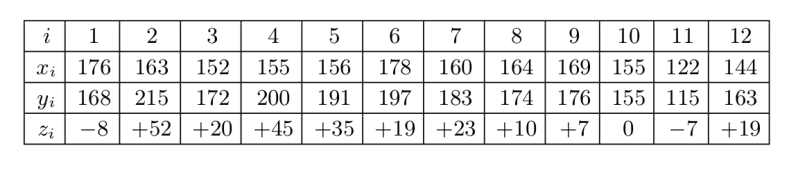

In [4]:
img_orig = np.int16(io.imread('table_0.png'))
img = np.float32(cv2.imread('table_0.png', 0))

plot_img(img)

## Morphological closing to find the table

In [5]:
from ipywidgets import IntSlider, interact

In [14]:
sld = IntSlider(value=30, min=0, max=60, step=1, continuous_update=False)


def vary_kernel_size(kernel_size=120):
    kernel1 = np.ones((1, kernel_size), dtype='uint8')
    kernel2 = np.ones((kernel_size, 1), dtype='uint8')

    a1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
    a2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
    
    a3 = np.min([a1, a2], axis=0)
    
    plot_img(a3)
    plot_img(a1)
    plot_img(a2)

In [15]:
interact(vary_kernel_size, kernel_size=sld);

interactive(children=(IntSlider(value=30, continuous_update=False, description='kernel_size', max=60), Output(…

In [16]:
def get_table_only(img, kernel_size=30):
    kernel1 = np.ones((1, kernel_size), dtype='uint8')
    kernel2 = np.ones((kernel_size, 1), dtype='uint8')

    a1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1)
    a2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel2)
    
    a3 = np.min([a1, a2], axis=0)
    
    return a3


img_table = get_table_only(img)

## Inverse subtraction

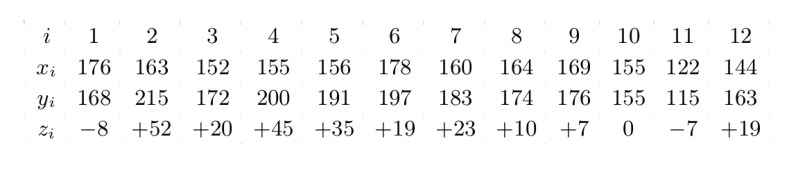

In [27]:
def inverse_img(img):
    return np.int16(255 - img)


a4 = inverse_img(img)
a5 = inverse_img(img_table)
# a6 = inverse_img(np.clip(a4 - a5, 0, 255))
a6 = inverse_img(np.clip(a4 - a5, 0, None))

plot_img(a6)

In [10]:
def subtract_table(img, img_table):
    a4 = inverse_img(img)
    a5 = inverse_img(img_table)
    a6 = inverse_img(np.clip(a4 - a5, 0, None))
    return a6

In [11]:
def remove_table_pipeline(img):
    return subtract_table(img, get_table_only(img))

In [12]:
res = remove_table_pipeline(img)

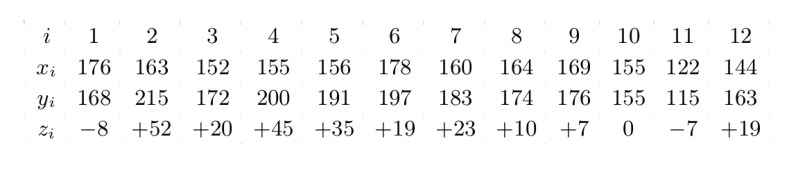

In [13]:
plot_img(res)